# The cut function
Both the cut and qcut functions convert columns with continuous values to categorical columns, but they apply different techniques. The cut function divides the entire value range into intervals of the same size, called bins. The range covered by each bin will be the same. If the minimum value is 0 and the maximum value is 10 and we want to divide the values into four groups (bins). The bins will be created as follows:

1. (-0.01, 2.5]
2. (2.5, 5]
3. (5, 7.5]
4. (7.5, 10]
 
The lower bounds aren’t inclusive. Thus, the lower bound of the smallest bin is slightly less than the smallest value to include it. Let’s look at an example to demonstrate how the cut function works in code.

In [ ]:
import pandas as pd

# Create a Series with values between 0 and 10
A = pd.Series([5, 0, 2, 8, 4, 10, 7])

# cut function
A_binned = pd.cut(A, bins=4)

print(A_binned)

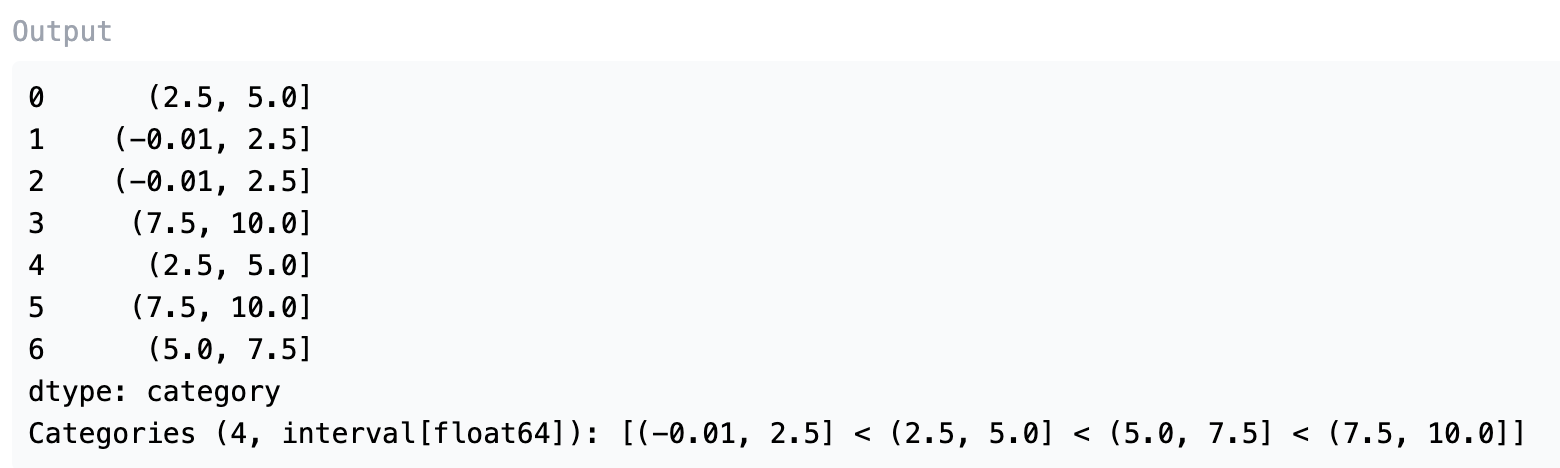

The output of the code snippet above shows the bin each value belongs to. For instance, the first value of the A is 5 and it belongs to (2.5, 5.0] in A_binned.

Four bins with equal widths are created according to the minimum and maximum values in the Series. Then, each value in the original Series is assigned to the appropriate bin. Binning is a highly practical way to convert continuous variables into categorical ones, especially when we work with variables with lots of values.

A typical use case would be classifying a list of products as cheap, mid-priced, or expensive according to their prices. By default, the value ranges are used as the name of the categories. We can assign names to the categories using the labels parameter.

We can create the bin ranges manually as well. Instead of specifying the number of bins, we pass a list of bin edges to the bins parameter. The following code block creates three bins and labels them small, medium, or large.

In [ ]:
import pandas as pd

# Create a Series with values between 0 and 10
A = pd.Series([5, 0, 2, 8, 4, 10])

# cut function
A_binned = pd.cut(A, bins=[-1, 3, 6, 10], labels=["small","medium","large"])

print(A_binned)
print("\n")
print(A_binned.value_counts())

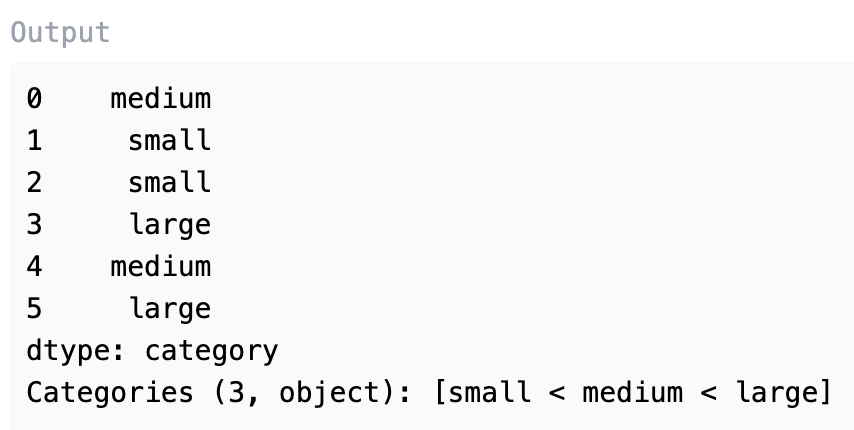

The value_counts function returns the unique values in a Series, along with their number of occurrences. In A_binned, there are two occurrences of small, medium, and large labels and this is what we see in the output of the value_counts function.



# The qcut function
The cut function divides the entire values range into bins of equal sizes. With the qcut function, the focus is on the number of values that fall into the bins. The qcut function groups the values into bins so that there is approximately the same number of values in each bin. The upper and lower bounds are adjusted accordingly. The following block of code demonstrates how the qcut function works.

In [ ]:
import pandas as pd

# Create a Series
A = pd.Series([1, 4, 2, 10, 5, 6, 8])

# The qcut function
A = pd.Series([1, 4, 2, 10, 5, 6, 8, 7, 5, 3, 5, 9])

A_binned = pd.qcut(A, q=3)

print(A_binned.value_counts())

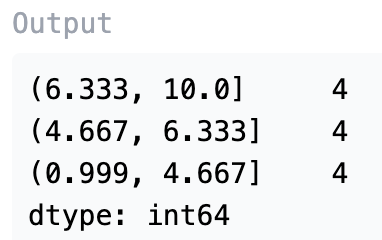

As we see in the output, three bins are created, and each bin contains four values, though they vary by width. By default, the qcut function creates bins with approximately the same number of values.

# Passing a list to the q parameter
The qcut function determines the bin size manually by passing a list to the q parameter. The list contains the quantile boundaries. If we pass the list [0, 0.50, 0.75, 1] to the q parameter, the first bin will be the 0.5 quantile. This means that the smallest 50 percent of values will be in the first bin. The second bin will contain the values from the 0.5 quantile to the 0.75 quantile. The remaining values will be in the last bin.

In [1]:
import pandas as pd

A = pd.Series([1, 4, 2, 10, 5, 6, 8])

# The qcut function
A = pd.Series([1, 4, 2, 3, 10, 5, 6, 8, 7, 5, 9, 14])

A_binned = pd.qcut(A, q=[0, 0.50, 0.75, 1])

print(A_binned.value_counts())

(0.999, 5.5]    6
(5.5, 8.25]     3
(8.25, 14.0]    3
Name: count, dtype: int64


A contains 12 values. As we see in the output, fifty percent of these values (or six of them) are in the first bin. The other two bins contain three values each, which is 25 percent of 12.

To summarize,

1. With the cut function, the focus is on the upper and lower bounds of the bins.

2. With the qcut function, the focus is the number of values in the bins.